# Visualization

This file is 5th file in the project to fit a mixture model to validate that we can obtain a consisitent group of clusters 
as those obtained from K-means.

In this file, I
    1) perform hierarchical clustering between GMM and Kmeans center to see any similar pair
    and 2) visualize similar pair

In [1]:
from sklearn import mixture
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from nilearn import plotting
from nilearn import image

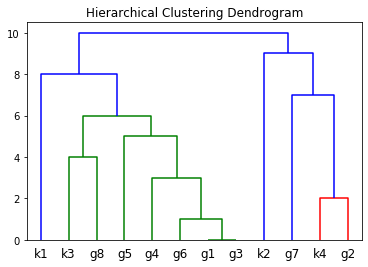

In [2]:
###################################################################
# Read Data for hierarchical clustering
gmm_c = pd.read_csv('./data/gmm_c.csv',header=None)
gmm_c= gmm_c.rename({0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4', 
                      4:'g5', 5: 'g6', 6: 'g7', 7: 'g8'}, 
                      axis='index')

kmeans_c = np.loadtxt('./data/kmeans_c.txt', delimiter=' ')
kmeans_c = pd.DataFrame(kmeans_c)
kmeans_c = kmeans_c.rename({0: 'k1', 1: 'k2', 2: 'k3', 3: 'k4',4: 'k5'}, 
	axis='index')

km_gmm = kmeans_c.append(gmm_c)
###################################################################

# Run hierarchical clustering
clustering = AgglomerativeClustering(linkage = 'average').fit(km_gmm)

# define a function to plot dendrogram
def plot_dendrogram(model, **kwargs):

    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# Examine the hierarchical clustering results
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering,labels = km_gmm.index)
plt.show()

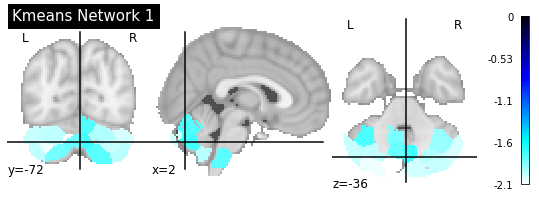

In [4]:
plotting.plot_stat_map('./nifti/kmeans_c1.nii.gz',title="Kmeans Network 1")

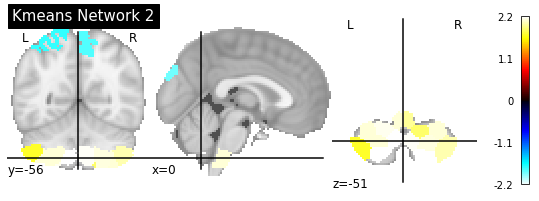

In [12]:
plotting.plot_stat_map('./nifti/kmeans_c2.nii.gz',title="Kmeans Network 2")

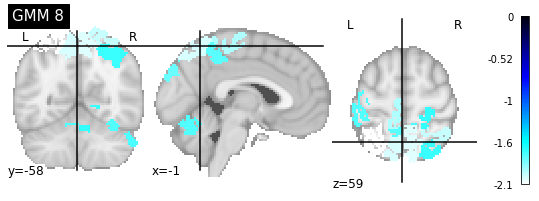

In [4]:
plotting.plot_stat_map('./nifti/gmm_c8.nii.gz',title="GMM 8")

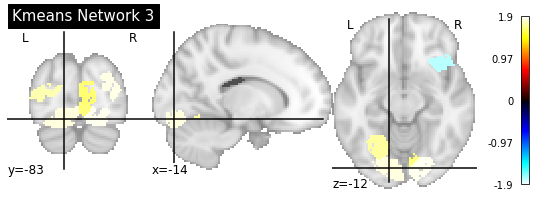

In [5]:
plotting.plot_stat_map('./nifti/kmeans_c3.nii.gz',title="Kmeans Network 3")

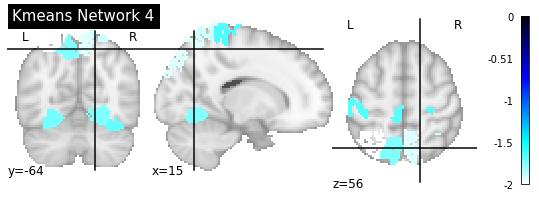

In [8]:
plotting.plot_stat_map('./nifti/kmeans_c4.nii.gz',title="Kmeans Network 4")

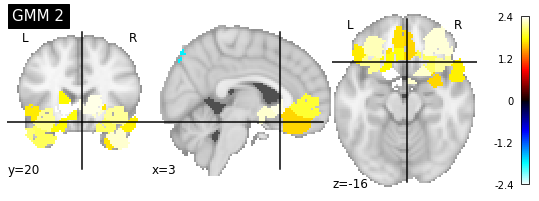

In [7]:
plotting.plot_stat_map('./nifti/gmm_c2.nii.gz',title="GMM 2")